# Predicting Lens Galaxy Magnitude

_Jenny Kim, Phil Marshall_

The OM10 mock lensed quasar catalog `qso_mock.fits` contains estimates of the lens galaxy $i$-band magnitudes, based on a simple Faber-Jackson scaling implemented by Phil Marshall. With the `lenspop` library we can compute synthetic magnitudes in any filter. In this notebook we compare the FJ magnitudes, in the `APMAG_I` column of the FITS table, and the `lenspop` synthetic magnitudes. We'll look at magnitude differences as a function of 1) the lenspop i-band magnitude and 2) the lens redshift.

### Requirements

Just `om10` and its dependencies:

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from __future__ import division
import om10, os
import numpy as np
import matplotlib
matplotlib.use('Agg')
matplotlib.rc('text', usetex=False)
import matplotlib.pyplot as plt
import corner
%matplotlib inline

First, let's read in the catalog, select a miniature LSST sample (1% of the survey area), and paint them with `lenspop`. This is still time consuming - a few seconds per lens.

In [15]:
db = om10.DB()
db.select_random(maglim=23.3, area=45.0, IQ=0.7)
db.paint(synthetic=True, target='lens', verbose=True)

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 7 lenses
OM10: computing synthetic magnitudes in the following bands:  ('r_SDSS', 'g_SDSS', 'i_SDSS', 'z_SDSS')
.......

In [16]:
print db.sample

 LENSID  FLAGTYPE NIMG ZLENS ...     g_SDSS        i_SDSS        z_SDSS   
-------- -------- ---- ----- ... ------------- ------------- -------------
21915868        0    4 0.872 ... 23.3428795566 19.3159541535 18.1344509558
35939314        0    4 1.084 ... 25.2085005655 20.9044039924 19.5033226519
20615625        0    4  0.85 ... 24.3921976745 20.4202840643 19.2814677758
53323697        0    4 1.304 ... 23.1592620505 18.9811532057 17.8847821789
 2416498        0    2  0.37 ... 22.2113563707 19.6282877614 19.2247078456
 4838165        0    2 0.478 ...   20.90160208 18.0820122555 17.5835272042
16756321        0    2  0.78 ...  24.439547487 20.6832484012 19.8024871053


Now let's plot these differences, which ideally should scatter around zero with some small dispersion (much less than 1 magnitude).

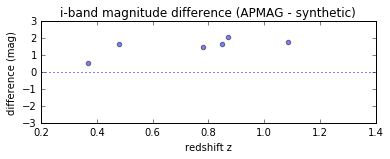

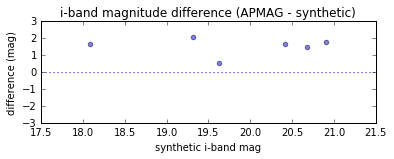

In [28]:
lens_APMAGI = db.sample['APMAG_I']
lens_i = db.sample['i_SDSS']
lens_redshift = db.sample['ZLENS']
diff = lens_APMAGI - lens_i

plt.subplot(2, 1, 1)
plt.scatter(lens_redshift, diff, alpha=0.5)
plt.axhline(y=0.0, linestyle='dotted')
plt.ylim(-3.0,3.0)
plt.title('i-band magnitude difference (APMAG - synthetic)')
plt.ylabel('difference (mag)')
plt.xlabel('redshift z')
plt.show()

plt.subplot(2, 1, 2)
plt.scatter(lens_i, diff, alpha=0.5)
plt.axhline(y=0.0, linestyle='dotted')
plt.ylim(-3.0,3.0)
plt.title('i-band magnitude difference (APMAG - synthetic)')
plt.ylabel('difference (mag)')
plt.xlabel('synthetic i-band mag')

## Discussion

The differences between the old `APMAG_I` and new, synthetic, `lenspop` `i_SDSS` lens galaxy magnitudes seem marked, ranging between 0 and 2 magnitudes (the `lenspop` magnitudes are brighter). Possible reasons for this discrepancy are:

* The `APMAG` values are wrong. This seems unlikely, but it would be worth checking against a sample of massive galaxies with known velocity dispersion and i-band magnitude: the SLACS and SL2S lenses for example.

* The `lenspop` values are wrong, probably because we are miscalculating something. We shoudl double check our offsets! 

The comparison with the known lens sample seems like a good next step.

We also note that the synthetic magnitude calculation is very slow: $\sim 1$ second per lens. This could be because the SED is being read in from file each time: some investigation of this is in order.
